# Zeitreihe erzeugen

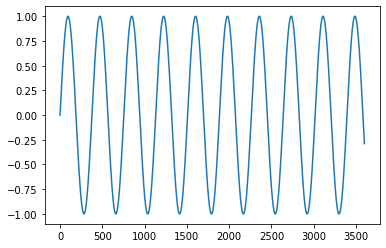

In [7]:
import numpy as np
import matplotlib.pyplot as plt

max_time = 3600.0
dt = 1.0
t = np.arange(0,max_time,dt)
s = np.sin(t/60)
plt.plot(t,s)
plt.show()

# Datenlücken simulieren

In [9]:
int(np.random.uniform(low=0,high=max_time-1))

1098

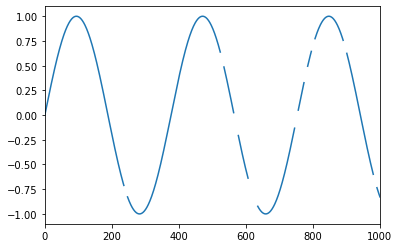

In [46]:
max_time = 3600.0
dt = 1.0
t = np.arange(0,max_time,dt)
s = np.sin(t/60)

anz_luecken = 50
breite_luecke = 10
for i in range(anz_luecken):
    rnd_t = int(np.random.uniform(low=0.0,high=max_time))
    s[rnd_t:rnd_t+breite_luecke] = np.nan
    
plt.plot(t,s)
plt.xlim(0,1000)
plt.show()

# Pandas-Tabelle erzeugen

In [47]:
import pandas as pd
df = pd.DataFrame( {"time": t, "sensor": s} )
df

,time,sensor
0,0.0,0.000000
1,1.0,0.016666
2,2.0,0.033327
3,3.0,0.049979
4,4.0,0.066617
...,...,...
3595,3595.0,-0.224477
3596,3596.0,-0.240686
3597,3597.0,-0.256829
3598,3598.0,-0.272900


In [48]:
df.describe()

,time,sensor
count,3600.000000,3131.000000
mean,1799.500000,0.048828
std,1039.374812,0.711544
min,0.000000,-0.999991
25%,899.750000,-0.644048
50%,1799.500000,0.100275
75%,2699.250000,0.773375
max,3599.000000,0.999996


In [49]:
df.query("sensor.isnull()")

,time,sensor
237,237.0,NaN
238,238.0,NaN
239,239.0,NaN
240,240.0,NaN
241,241.0,NaN
...,...,...
3421,3421.0,NaN
3422,3422.0,NaN
3423,3423.0,NaN
3424,3424.0,NaN


# Erfinden von Daten

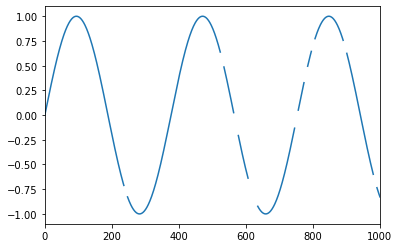

In [50]:
plt.plot(df["sensor"])
plt.xlim(0,1000)
plt.show()

In [51]:
df["sensor"]

0       0.000000
1       0.016666
2       0.033327
3       0.049979
4       0.066617
          ...   
3595   -0.224477
3596   -0.240686
3597   -0.256829
3598   -0.272900
3599   -0.288895
Name: sensor, Length: 3600, dtype: float64

In [52]:
df["sensor"].count()

3131

In [53]:
df["sensor"].describe()

count    3131.000000
mean        0.048828
std         0.711544
min        -0.999991
25%        -0.644048
50%         0.100275
75%         0.773375
max         0.999996
Name: sensor, dtype: float64

In [54]:
df["sensor"].interpolate()

0       0.000000
1       0.016666
2       0.033327
3       0.049979
4       0.066617
          ...   
3595   -0.224477
3596   -0.240686
3597   -0.256829
3598   -0.272900
3599   -0.288895
Name: sensor, Length: 3600, dtype: float64

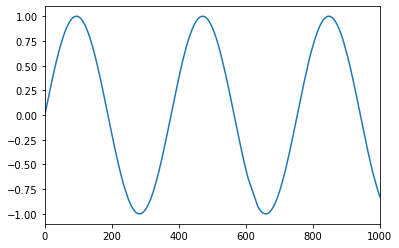

In [55]:
plt.plot(df["sensor"].interpolate())
plt.xlim(0,1000)
plt.show()

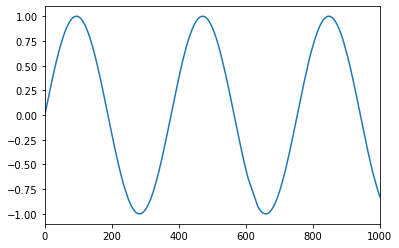

In [56]:
plt.plot(df["sensor"].interpolate(method="linear"))
plt.xlim(0,1000)
plt.show()

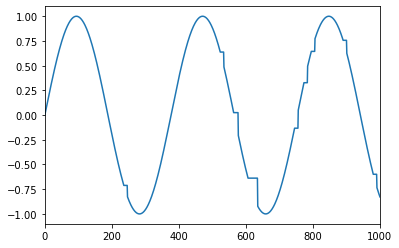

In [57]:
plt.plot(df["sensor"].interpolate(method="pad"))
plt.xlim(0,1000)
plt.show()

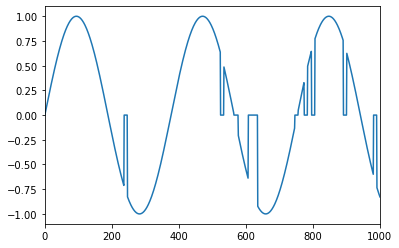

In [58]:
plt.plot(df["sensor"].fillna(0))
plt.xlim(0,1000)
plt.show()

# Vewerfen von Daten

In [62]:
len(df["sensor"])

3600

In [63]:
df["sensor"].describe()

count    3131.000000
mean        0.048828
std         0.711544
min        -0.999991
25%        -0.644048
50%         0.100275
75%         0.773375
max         0.999996
Name: sensor, dtype: float64

In [66]:
df["sensor"].dropna()

0       0.000000
1       0.016666
2       0.033327
3       0.049979
4       0.066617
          ...   
3595   -0.224477
3596   -0.240686
3597   -0.256829
3598   -0.272900
3599   -0.288895
Name: sensor, Length: 3131, dtype: float64

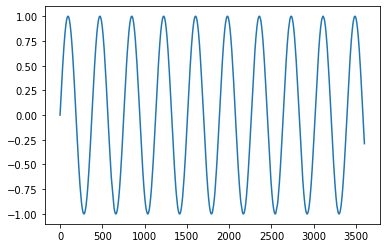

In [70]:
plt.plot(df["sensor"].dropna())
plt.show()

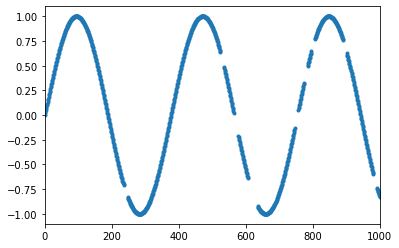

In [72]:
plt.plot(df["sensor"], ".")
plt.xlim(0,1000)
plt.show()

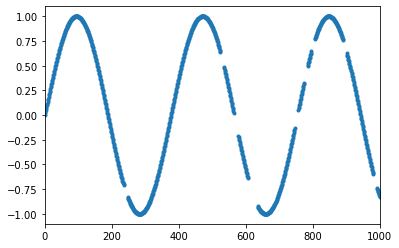

In [73]:
plt.plot(df["sensor"].dropna(), ".")
plt.xlim(0,1000)
plt.show()

# Gleitende Fenster

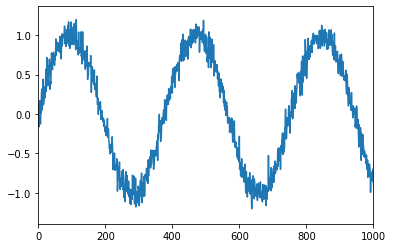

In [77]:
import numpy as np
import matplotlib.pyplot as plt

max_time = 3600.0
dt = 1.0
t = np.arange(0,max_time,dt)
s = np.sin(t/60) + np.random.normal(0.0,0.1,size=len(t))
plt.plot(t,s)
plt.xlim(0,1000)
plt.show()

In [83]:
df = pd.DataFrame( {"time":t, "sensor" : s} )

In [84]:
df

,time,sensor
0,0.0,0.009940
1,1.0,-0.164251
2,2.0,0.138881
3,3.0,-0.023417
4,4.0,0.123415
...,...,...
3595,3595.0,-0.236905
3596,3596.0,-0.282789
3597,3597.0,-0.221688
3598,3598.0,-0.231894


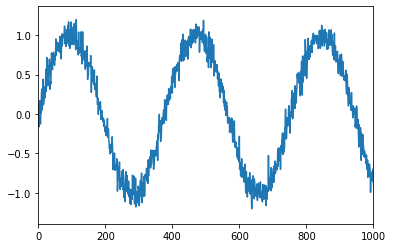

In [85]:
plt.plot(t, df["sensor"])
plt.xlim(0,1000)
plt.show()

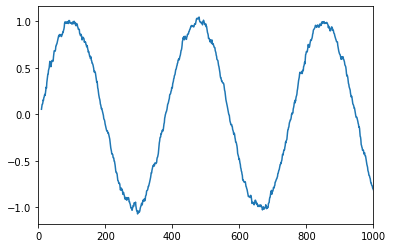

In [87]:
plt.plot(t, df["sensor"].rolling(10).mean())
plt.xlim(0,1000)
plt.show()

In [88]:
df["sensor"].rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [89]:
df["sensor"].rolling(10).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3595   -0.200883
3596   -0.233256
3597   -0.240820
3598   -0.251602
3599   -0.239316
Name: sensor, Length: 3600, dtype: float64

In [90]:
df["sensor"].rolling(10).mean().head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9    0.054677
Name: sensor, dtype: float64